In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
df=pd.read_csv('ecommerce.csv')

In [3]:
df.head()

,Unnamed: 0,landing_page,purchased,inter,old_page
0,0,old_page,0,1,1
1,1,old_page,0,1,1
2,2,old_page,1,1,1
3,3,old_page,1,1,1
4,4,old_page,1,1,1


## Probability

What is The proportion of users purchased?

In [4]:
(df.purchased == 1).mean()

0.3044

What is the probability of an individual purchasing regardless of the page they receive?

In [5]:
(df.purchased == 1).mean()

0.3044

Given that an individual was in the `control` group, what is the probability they purchased?

In [6]:
(df[df.landing_page == 'old_page'].purchased == True).mean()

0.3082901554404145

Given that an individual was in the `treatment` group, what is the probability they purchased?

In [7]:
(df[df.landing_page == 'new_page'].purchased == True).mean()

0.3004817342432758

What is the probability that an individual received the new page?

In [8]:
(df.landing_page == 'new_page').mean()

0.4982

#### Can we conclude anything?

\begin{equation} H_{0} : p_{old} - p_{new} >= 0 \end{equation}

\begin{equation} H_{1} : p_{old} - p_{new} < 0 \end{equation}

 Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **purchased** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **purchased** rate in **df** regardless of the page. <br><br>

### Create a difference histogram using binomial r.v then bootstrapping

Hint: First calculate $p_{new}$ , $p_{old}$ , $n_{new}$ , $n_{old}$

In [9]:
p_new = (df.purchased== 1).mean()
p_old = p_new
p_new, p_old

(0.3044, 0.3044)

In [10]:
n_new = (df.landing_page == 'new_page').sum()
n_old = (df.landing_page == 'old_page').sum()
n_new, n_old

(4982, 5018)

In [11]:
start_time = time.time()
p_diffs = []

for _ in range(10000):
    p_n = (np.random.choice([0,1],size=n_new,p=[1-p_new,p_new])).mean()
    p_o = (np.random.choice([0,1],size=n_old,p=[1-p_new,p_new])).mean()    
    p_diffs.append(p_n - p_o)
    
print("--- %s seconds ---" % (time.time() - start_time))


--- 4.630598545074463 seconds ---


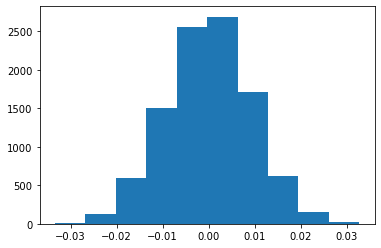

In [12]:
plt.hist(p_diffs);

In [13]:
start_time = time.time()


new_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs2 = new_simulation - old_simulation

print("--- %s seconds ---" % (time.time() - start_time))


--- 0.0 seconds ---


(array([   9.,   91.,  461., 1429., 2741., 2753., 1717.,  650.,  135.,
          14.]),
 array([-0.0355375 , -0.02862447, -0.02171143, -0.0147984 , -0.00788537,
        -0.00097233,  0.0059407 ,  0.01285373,  0.01976677,  0.0266798 ,
         0.03359284]),
 <BarContainer object of 10 artists>)

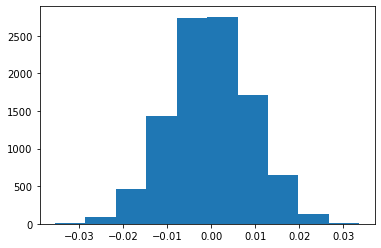

In [14]:
plt.hist(p_diffs2)

In [15]:
sim = np.random.normal(0, np.std(p_diffs2),10000)

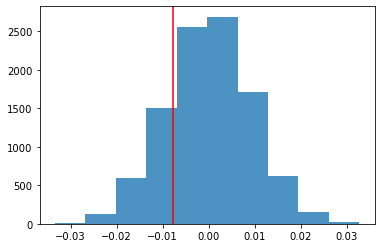

0.8013

In [16]:
p_old_data = (df[df.landing_page == 'old_page'].purchased == True).mean()
p_new_data = (df[df.landing_page == 'new_page'].purchased == True).mean()
statstic = p_new_data - p_old_data
p_val = (p_diffs > statstic).mean()

_ = plt.hist(p_diffs,alpha = 0.8)
_ = plt.axvline(statstic,color = 'red')
plt.show()
p_val

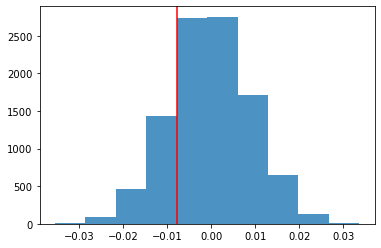

0.7975

In [17]:
p_old_data = (df[df.landing_page == 'old_page'].purchased == True).mean()
p_new_data = (df[df.landing_page == 'new_page'].purchased == True).mean()
statstic = p_new_data - p_old_data
p_val = (p_diffs2 > statstic).mean()

_ = plt.hist(p_diffs2,alpha = 0.8)
_ = plt.axvline(statstic,color = 'red')
plt.show()
p_val

## Confidence Intervals

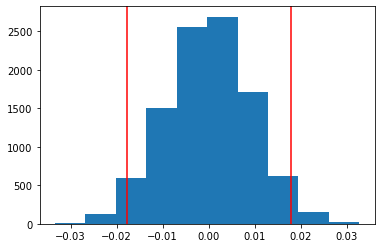

In [18]:
plt.hist(p_diffs);
np.percentile(p_diffs,0.25), np.percentile(p_diffs,0.95)
plt.axvline(np.percentile(p_diffs,2.5), color = 'red')
plt.axvline(np.percentile(p_diffs,97.5), color = 'red')

In [19]:
import statsmodels.api as sm

convert_old = p_old_data
convert_new = p_new_data
n_old = n_old
n_new = n_new

In [20]:
sm.stats.proportions_ztest([n_new*convert_new,n_old*convert_old],[n_new,n_old],0,'larger')

(-0.8484540188432473, 0.8019074151591514)

### Time Comparison

In [25]:
t_loop = []
t_vector = []
n = [1,10,100,1000,10000]

In [29]:
for k in n:
    start_time = time.time()
    p_diffs = []

    for _ in range(k):
        p_n = (np.random.choice([0,1],size=n_new,p=[1-p_new,p_new]) == 1).mean()
        p_o = (np.random.choice([0,1],size=n_old,p=[1-p_new,p_new]) == 1).mean()    
        p_diffs.append(p_n - p_o)

    print("--- %s seconds ---" % (time.time() - start_time))
    t_loop.append(time.time() - start_time)

--- 0.0029916763305664062 seconds ---
--- 0.0055882930755615234 seconds ---
--- 0.04940676689147949 seconds ---
--- 0.49124813079833984 seconds ---
--- 5.283188581466675 seconds ---


In [27]:
for k in n:
    start_time = time.time()


    new_simulation = np.random.binomial(n_new, p_new, k)/n_new
    old_simulation = np.random.binomial(n_old, p_old, k)/n_old
    p_diffs2 = new_simulation - old_simulation

    t_vector.append(time.time() - start_time)

In [30]:
new_simulation

array([0.31393015, 0.29767162, 0.31312726, ..., 0.3073063 , 0.30208752,
       0.29807306])

Text(0, 0.5, 'Time')

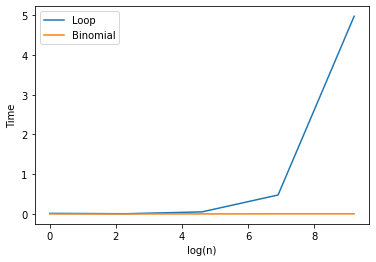

In [28]:
plt.plot(np.log(n),t_loop)
plt.plot(np.log(n),t_vector);
plt.legend(['Loop', 'Binomial'])
plt.xlabel('log(n)')
plt.ylabel('Time')